In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from COCOdataset import COCODataset

root = "F:"
bbox_file = f"{root}/coco2014/annotations/instances_train2014.json"
cap_file= f"{root}/coco2014/annotations/captions_train2014.json"
image_root = f"{root}/coco2014/train2014"
mycoco = COCODataset(bbox_file, cap_file, image_root)

loading annotations into memory...
Done (t=8.82s)
creating index...
index created!
loading annotations into memory...
Done (t=0.35s)
creating index...
index created!


In [13]:
index = 10
image, captions, bbox, cat = mycoco[index]
print("image shape:", image.shape)
print("caption shape:", captions.shape)
print("bbox shape:", bbox.shape)
print("category shape:", cat.shape) 

image shape: torch.Size([3, 224, 224])
caption shape: torch.Size([5, 77])
bbox shape: torch.Size([12, 4])
category shape: torch.Size([12])


In [14]:
# choose one bbox, show its category
mycoco.getCatName(cat[0].item())

'chair'

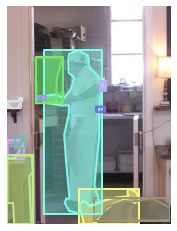

In [15]:
mycoco.showBboxAnn(index)

In [16]:
# one image has five captions
mycoco.showCaptionAnn(index)

a person in white is standing in a kitchen
A chef slides a pizza into a brick oven.
a man wearing an apron and standing next to an oven
A man with a ball cap and an apron using a brick oven. 
The baker is getting ready for his bread to be ready.
